In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = np.array([[0,1], [1,0], [1,1], [0,0]])
y = np.array([[1], [1], [0], [0]])


In [3]:
num_input = 2
num_hidden = 5
num_output = 1

In [4]:
Wxh = np.random.randn(num_input, num_hidden)
bh = np.zeros((1, num_hidden))
Why = np.random.randn(num_hidden, num_output)
by = np.zeros((1, num_output))


In [5]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))
    

In [6]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)
    

In [7]:
def forward_prop(x, Wxh, Why):
    z1 = np.dot(x, Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1, Why) + by
    y_hat = sigmoid(z2)

    return z1, a1, z2, y_hat

In [8]:
def backward_prop(y_hat, z1, a1, z2):
    
    delta2 = np.multiply(-(y-y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    dJ_dby = delta2
    delta1 = np.dot(delta2, Why.T) * sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    dJ_dbh = delta1
    
    return dJ_dWxh, dJ_dWhy, dJ_dbh, dJ_dby


In [9]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J
    

In [10]:
alpha = 0.01
num_iterations = 10000

cost = []
for i in range(num_iterations):
    z1, a1, z2, y_hat = forward_prop(X, Wxh, Why)
    dJ_dWxh, dJ_dWhy, dJ_dbh, dJ_dby = backward_prop(y_hat, z1, a1, z2)

    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy
    bh = bh - alpha * dJ_dbh
    by = by - alpha * dJ_dby

    c = cost_function(y, y_hat)
    cost.append(c)
    

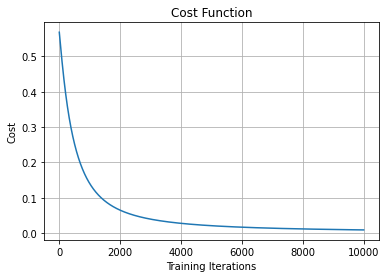

In [11]:
plt.grid()
plt.plot(range(num_iterations), cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.show()


In [12]:
_, _, _, pred = forward_prop(X, Wxh, Why)
print(pred)


[[0.9402146 ]
 [0.93216196]
 [0.06762825]
 [0.06723748]]
